**Содержание темы**

1. Теория

2. [Практический ноутбук 1](https://colab.research.google.com/drive/13xkDwB-KXbBevOiPpBC2g-t8q7nG0tAO?usp=sharing)

3. [Практический ноутбук 2](https://colab.research.google.com/drive/16sKNs9MCoVUuuGrhhl-yHgBlhrBWpNPa?usp=sharing)


На втором занятии в рамках обработки текстов вы изучите рекуррентные и сверточные нейронные сети.

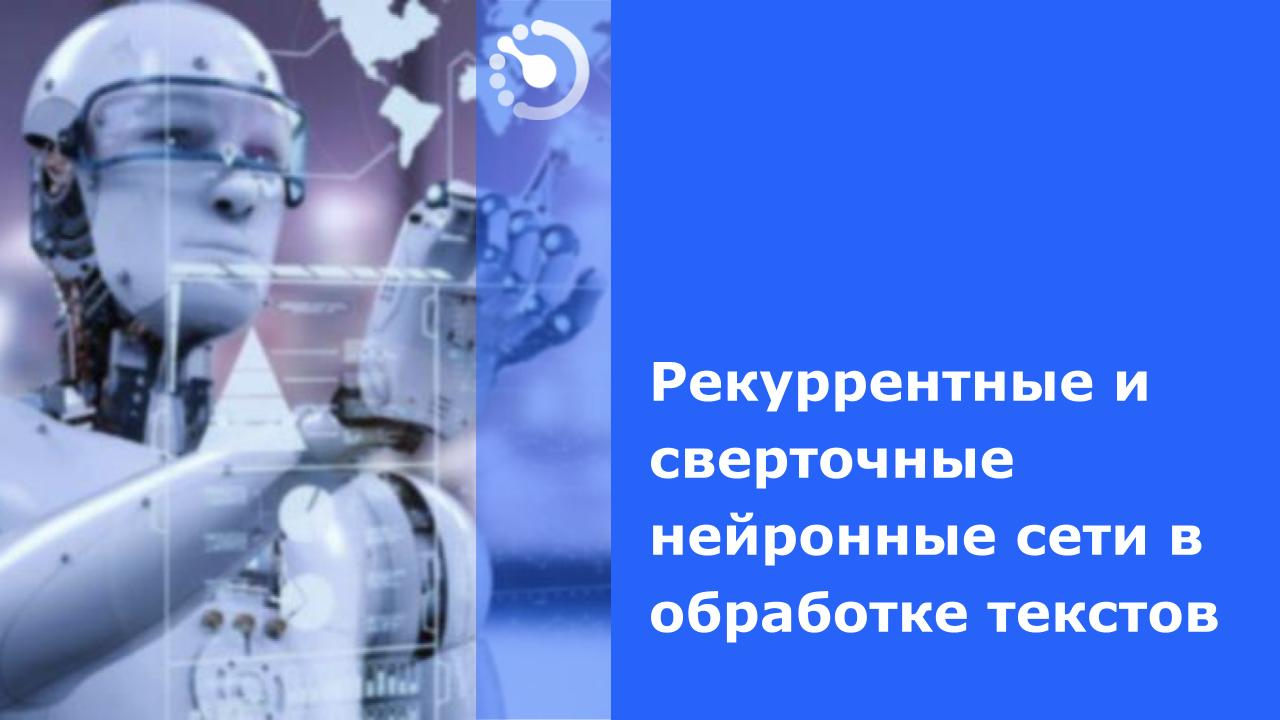

Вспомните, что вы уже знаете об обработке текста. Самое важное: НС работают только с числами, а потому любую информацию необходимо оцифровывать, и тексты – не исключение. На прошлом уроке вы освоили инструмент, который помогает оцифровывать и токенизировать текст – **токенизатор** библиотеки **Keras**. При помощи него создают частотный словарь, в котором каждому слову текста присваивается определенный индекс. Дальше уже различными методами работают с индексами слов.



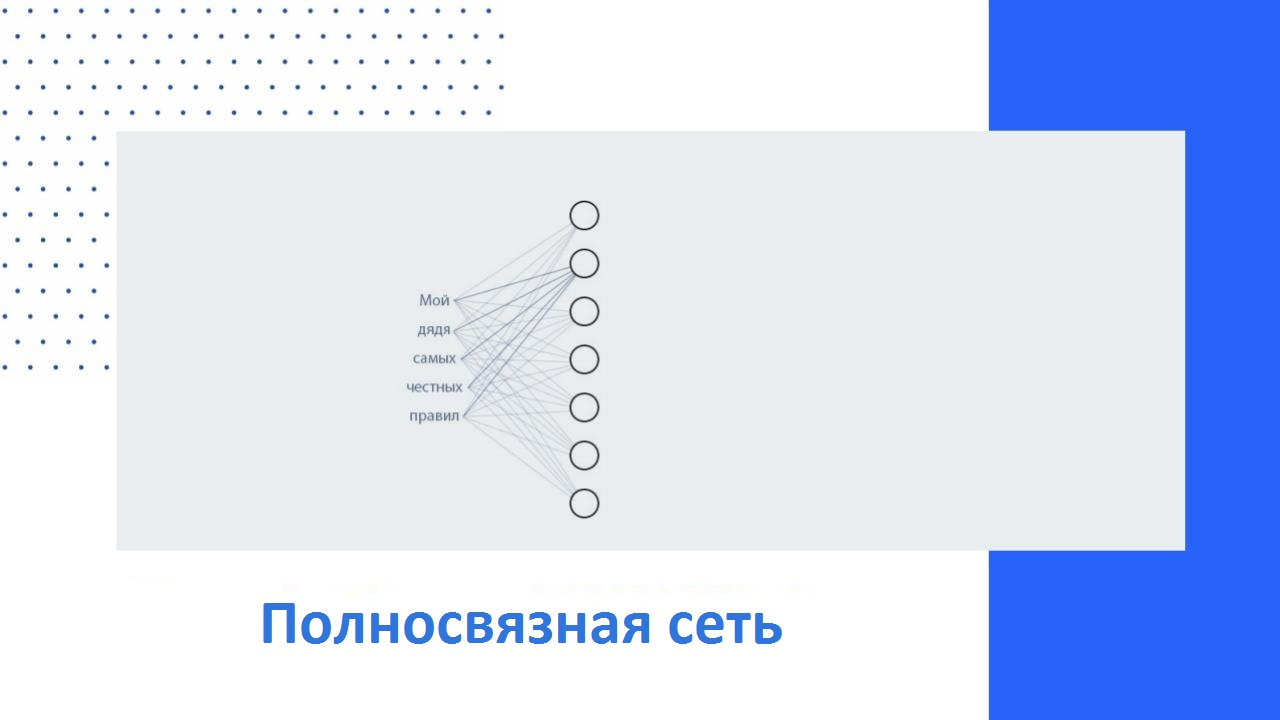

### **One-Hot Encoding** и **Bag Of Words**

Возьмем в качестве примера фразу **_«мой дядя самых честных правил»_**. Для наглядности оставим ее в текстовом представлении, но не забудем, что НС работают только с числами, и все слова сначала переводятся в индексы. Для обработки этих слов используют обычный полносвязный слой. Каждый нейрон одновременно "воспринимает" все слова. Если поменять слова местами, логика работы нейронов не изменится; на выходе нейронов будет тот же результат.

Рассмотрим обработку фразы **_"мой дядя самых честных правил"_** полносвязной сетью.

**Шаг 1:**
> Индексируем слова с помощью токенизатора. 
Получаем список инексов слов: **[3, 7, 19, 8, 1]**.

**Шаг 2:**
> Переводим идексы в формат **one-hot encoding**. Положим размер словаря равным **15**:

                1 │ 2 │ 3 │ 4 │ 5 │ 6 │ 7 │ 8 │ 9 │ 10 │ 11 │ 12 │ 13 │ 14 │ 15
        мой     0   0   1   0   0   0   0   0   0   0    0    0    0    0    0
        дядя    0   0   0   0   0   0   1   0   0   0    0    0    0    0    0
        самых   0   0   0   0   0   0   0   0   0   0    0    0    0    0    0
        честных 0   0   0   0   0   0   0   1   0   0    0    0    0    0    0
        правил  1   0   0   0   0   0   0   0   0   0    0    0    0    0    0

**Шаг 3:**
> Составим **bag of words (BOW)**:
* **[1 0 1 0 0 0 1 1 0 0 0 0 0 0 0]**

**Обрабтите внимание**. Слово «самых» не вошло в финальный вектор, так как его индекс 19 больше размера словаря (и алгоритм просто проигнорирует это слово)

В итоге мы получилам простое и понятное представление изучаемой фразы. Для полносвязной сети такое предствление текста вполне естественно. Каждый элемент **BOW** поступает на каждый нейрон сети, сеть воспринимает сразу всю фразу... 

При формировании векторов **BoW** часто возникает вопрос, касательно ситуации повторения слов. Например, как должен выглядеть финальный вектор, если у нас ихсодное предложение: ***мой дядя самых честных честных правил***
* **[1 0 1 0 0 0 1 1 0 0 0 0 0 0 0]**

или 

* **[1 0 1 0 0 0 1 2 0 0 0 0 0 0 0]**

Нв самом деле допустим оба варианта. По умолчанию токенайзер сформирует вектора без учета повторений (то есть состоящий из единиц). Но с помощью дополнительных настроек можно указать токенайзеру задачу подсчета количества повторений и мы получим вектор второго типа.

При все простоте метода, есть и отрицательные моменты:
1. **BOW** учитывает состав фразы, но не учитывает порядок слов.
2. Для нейронки все слова различаются по индексам. А токенизатор раздает индексы согласно частоте появления слов. Все однокоренные слова, слова-синонимы могут получить совершенно разные индексы. А вот антонимы вполне могут оказаться в соседних позициях в **BOW**. Наша нейронка найдет все индексы, но смысла предложения не уловит. 
 
 Скажем, во  фразе **"был у меня дядюшка сильно порядочным"** - нейронка узнает совсем другие слова, совсем другое содержание.
3. Объем занимаемой памяти. На каждый **BOW** тратится **размер_словаря** ячеек оперативной памяти. Войдет ли **"Война и мир"** в формате **BOW** в память компьютера?

---

Где **BOW** может быть хорош? Там, где мало слов и не важен их порядок.

---

Например:
* при классификации лекарств по составу;
* при анализе комплектации автомобиля;
* при классификации отзывов на товары по ключевым словам.

В этих примерах важно наличие определенных слов во фразе. И какая разница, что в начале, колеса или подогрев руля?

Стоит ли отказаться о **BOW** в других случаях? Вовсе незачем! При разработке нейронной сети всегда стоит пробовать разные варианты, и **BOW** - не исключение.



### **Эмбеддинги (Embedding)**

Недостатки **BOW** порождают следущие соображения:

1. А давайте синонимы группировать поближе друг к другу, а антонимы подальше от них. Для этой цели хорош **Embedding**. Если ранее мы сопоставляли слову один индекс (число), то **Embedding** каждому слову поставит в соответствие **N-мерный вектор** - сразу **N** чисел. Ниже показан двумерный пример группировки слов хорошо обученным эмбеддингом. Слова, близкие по значению (синонимы), даже ассоциативно связанные, собируются в "облачко", их векторы-представления находятся близко друг к другу. В результате **Embedding**-представление помогает научить сеть лучше выделять смысл текста.

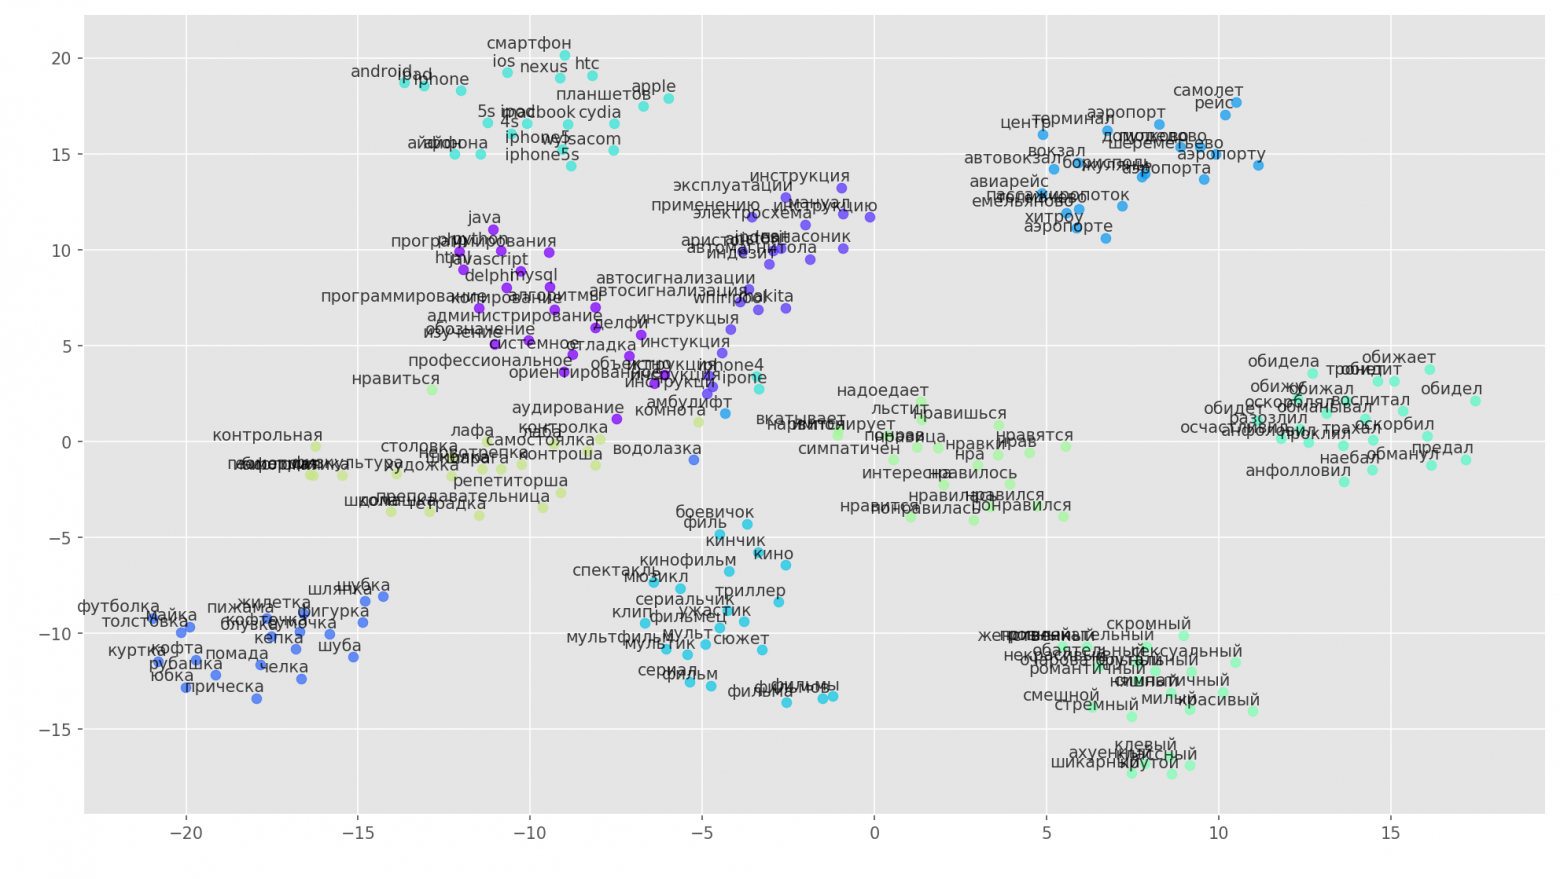

2. А давайте учитывать порядок слов в предложении. Представим фразу как временной ряд - одномерную последовательность. Точно так, как будто человек фразу произносит или пишет. Каждое слово взаимосвязано с соседними. Изменим порядок слов - фраза утратит первоначальный смысл.

Для обработки одномерных рядов используют ***RNN - рекурентные нейронные сети*** и ***CNN - сверточные нейронные сети***. 
Ниже познакомимся с этими видами сетей.

### **RNN - рекурентные сети**

Идея рекуррентных слоев состоит в том, что на вход нейронов подаются не только слова - одно за другим, но и результат обработки предыдущих слов - выходы нейронов. Это позволяет нейронам учитывать всю полученную ранее фразу, что помогает запомнить (и учесть при обработке) контекст и логику предложения.







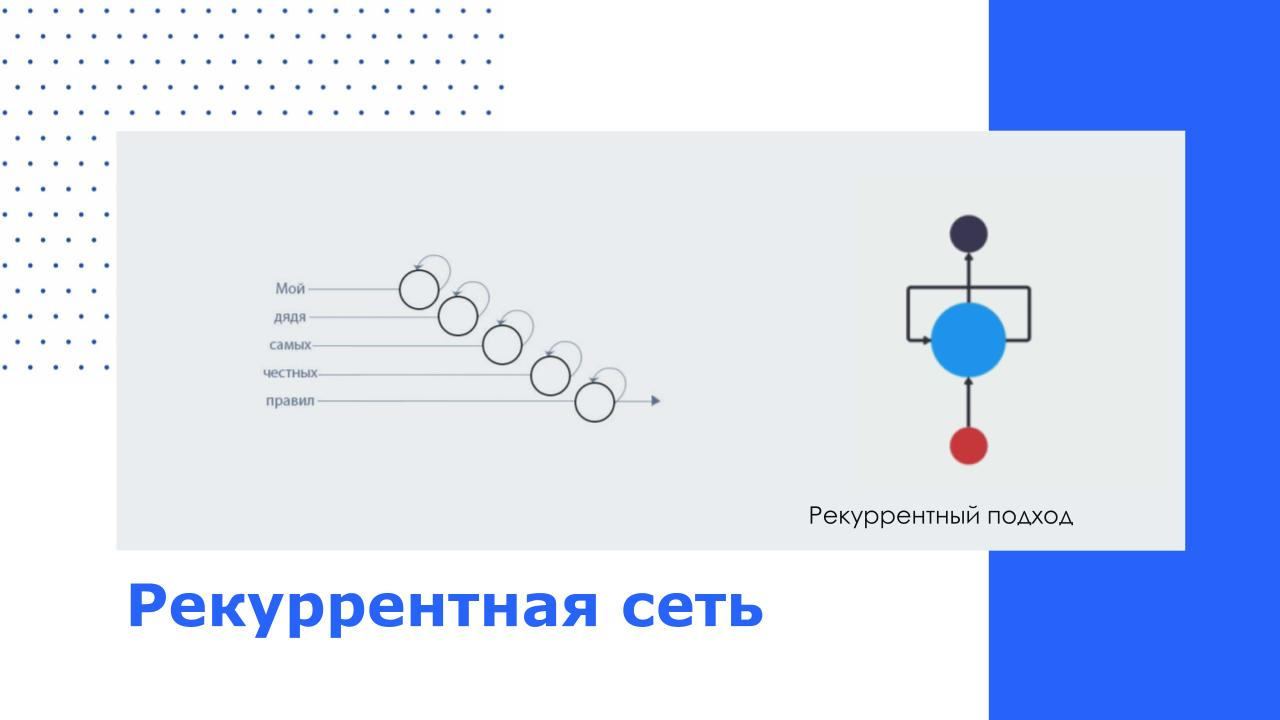

Если рассматривать пошагово, то в начале на вход нейрона подается слово **«мой»**, результат обработки подается на вход в этот же нейрон ***в следующий момент времени***. Дальше слово **«дядя»** подается в этот же нейрон и так далее. Самое главное, что слова последовательно подают в один и тот же нейрон. И только после того, как все слова поочередно загружены, получаем на выходе информацию обо всем предложении.

Так и работает рекуррентный слой: информация зацикливается на нейроне. Основное преимущество этого инструмента в том, что можно обрабатывать не просто несколько слов, а целые осмысленные предложения.

Где полезен такой подход?

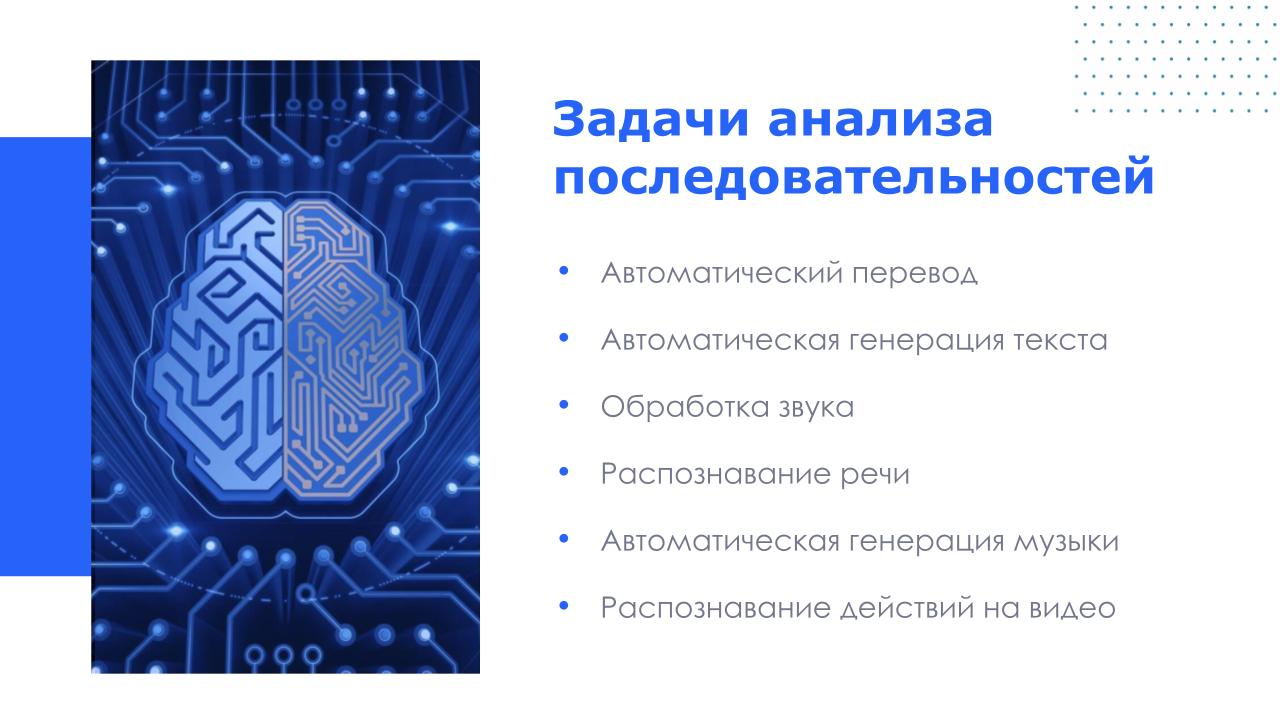

Вспомним, как раньше автоматические переводчики переводили тексты. Это был набор несвязанных между собой слов, часто не соответствующих контексту и смыслу. Сейчас машинные переводчики практически избавились от таких проблем; в этом помогли рекуррентные сети. 

Рекуррентные сети используют не только при переводе текста, но и при его генерации. Звук, музыка, речь - все они имеют свойство контекста и последовательности. Рекуррентные сети помогают распознавать речь, обрабатывать звук, генерировать музыку. Похожим образом обстоят дела и с видео: кадр за кадром создают определенную последовательность и затем подают на вход модели.

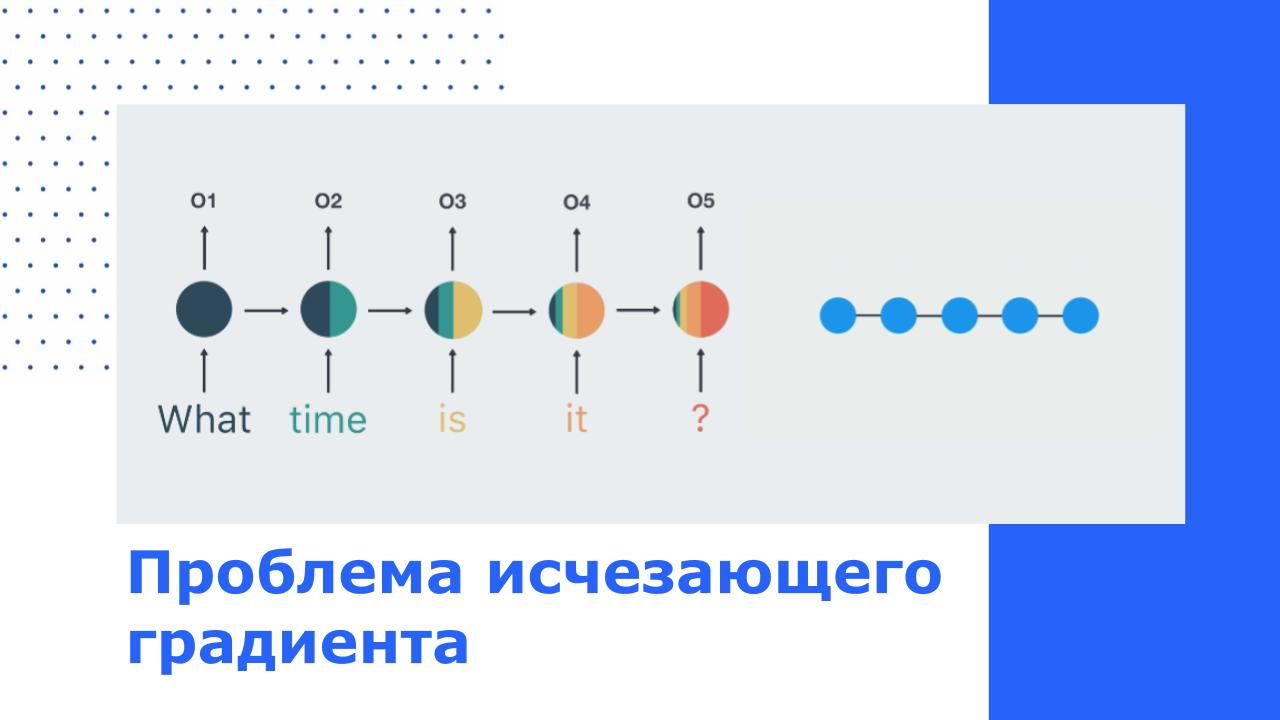

Но при такой большой пользе у рекуррентных сетей есть свои недостатки. Одна из самых больших проблем, которая возникла вместе с их появлением – ***проблема исчезновения градиента***. Она появилась из-за математического устройства обучения НС. В общих чертах коснемся этой проблемы, не углубляясь в математику.

Процесс обучения состоит из трех этапов:

1. Прямой проход, когда в НС подают входные данные. Обучающая выборка прогоняется через НС и дает результат.
2. Выход сети сравнивается с верным ответом и вычисляется значение фунции потерь (**loss**).
3. Завершающий этап – изменение весов модели. Здесь все реализовано за счет ***backpropagation*** – алгоритма ***обратного распространения ошибки***. Он сводится к тому, что для каждого веса, независимо от их количества, рассчитывается частная производная по результатам потерь (***градиент***). Градиент указывает, в какую сторону нужно изменить вес модели, чтобы потери уменьшились.

Так вот, если входное предложение длинное, а сеть более-менее сложная и глубокая, то на шаге 3, при обратном распространении ошибки от последнего слоя к первому, градиент становится все меньше и меньше - "исчезает". В результате первые слои модели совсем перестают обучаться.

Пролема изчезновения градиента возникла на заре применения рекуррентных сетей, но сейчас найдены хорошие методы для ее решения.

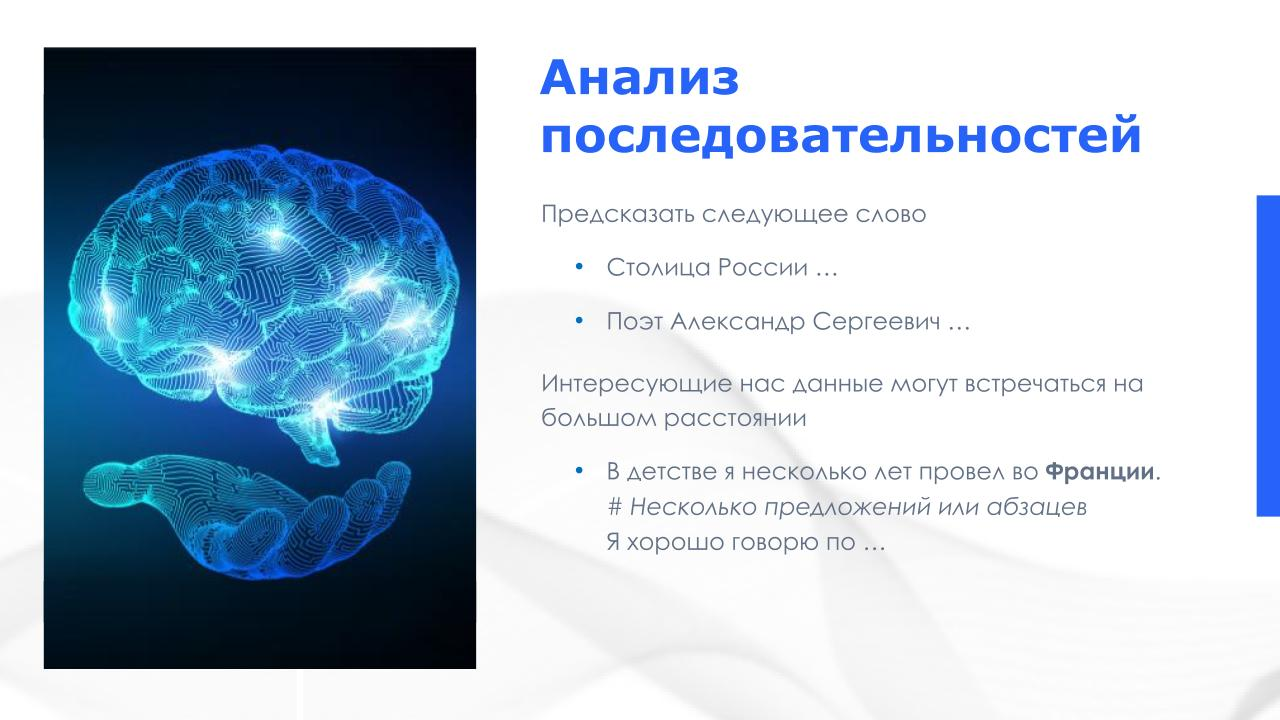

Рекуррентные слои прекрасно справляются с задачей предсказания следующих слов, как в примере на слайде выше. Им не мешает, что определяющее слово и слово, которое необходимо предсказать, находятся друг от друга на большом расстоянии. Ведь информация о результате обработки ранних слов зациклена на нейроне и не теряется.

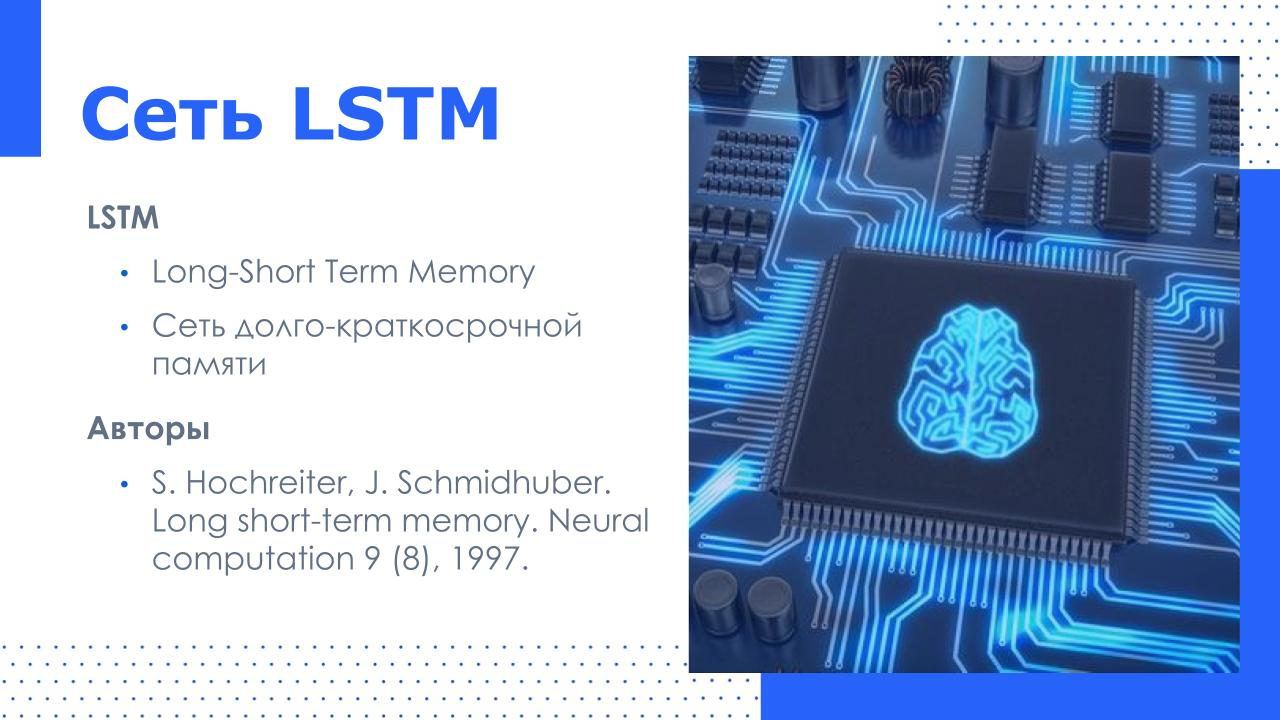

**LSTM (Long short-term memory)** - ***"долгая краткосрочная память"*** разработана для решения проблемы исчезновения градиента.

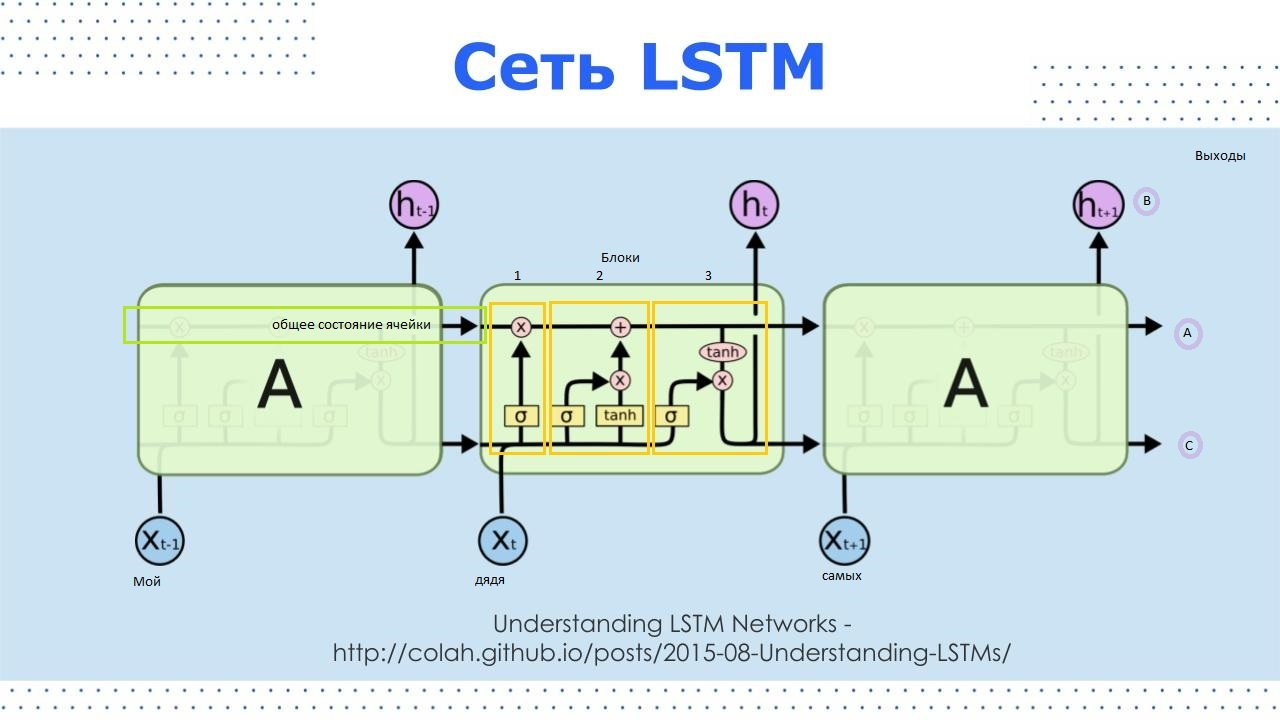

Слой **LSTM**-нейронов реализован в **Keras** так же, как и любой другой слой. Это самый сложный слой в библиотеке **Keras** ввиду замысловатой логики его работы.

На слайде изображен принцип действия слоя. На схеме работа одного и того же нейрона разложена во времени. На каждом шаге последовательно подают слова $(X_{t-1},\: X_t,\: X_{t+1})$. Каждый нейрон **LSTM**-слоя состоит из нескольких подсетей. Фактически это несколько полносвязных сетей!

Каждая ячейка (нейрон) в момент времени имеет два состояния:
* ***внутреннее состояние*** - вектор, показанный на схеме верхней горизонтальной стрелкой, проходящей через ячейки и выходящей справа к букве $A$;
* ***скрытое состояние*** - вектор, показанный на схеме нижней горизонтальной стрелкой, выходящей к букве $C$. Скрытое состояние является выходом нейрона.

Разберемся в работе рекуррентного нейрона по схеме: в нейрон на итерации $t$ подается слово (вход нейрона снизу) $X_t$;

Внизу слева подается значение скрытого состояния этого же нейрона в предыдущий момент времени $t-1$ (то есть, выход нейрона с обработки предыдущего слова "зациклен" на вход);

Скрытое состояние нейрона с прошлой итерации $t-1$ объединяется (конкатенируется) с информацией поданного слова $X_t$ (на картинке обозначено соединением стрелок в левом нижнем углу ячейки);

Вверху слева в нейрон подается его внутреннее состояние в предыдущий момент времени (то есть, нейрон "помнит" состояние с прошлой итерации и накапливает там информацию).

Каждую ячейку можно разбить на несколько блоков:
* **_блок обновления данных_**: решает, какое количество информации с прошлой итерации нужно оставить во внутреннем состоянии ($A$) нейрона, а какое - стереть. Полносвязный слой с сигмоидой на выходе на основании объединенного входа выдает результат от **0** до **1**. Выход сети умножается на внутреннее состояние ячейки ($A$), регулируя количество оставляемой информации. Если выход сети ближе к **1**, то данные во внутреннем состоянии почти не изменятся, а если ближе к **0** - то будут почти стерты;

* **_блок запоминания данных_**: добавляет новые данные из объединенного входа во внутреннее состояние ($A$). Значение объединенного входа проходит через полносвязную регулирующую сеть с сигмоидой (выдает значение от **0** до **1**), и сеть с гиперболическим тангенсом на выходе (от **-1** до **+1**). При перемножении выходов двух сетей получается результат в диапазоне от **-1** до **+1**. 

 Затем результат произведения складывается с внутренним состоянием ($A$). Таким образом, блок обновления решает, сколько старой информации нужно забыть, а блок запоминания - сколько новой добавить во внутреннее состояние нейрона. Количество добавляемой информации также регулируется сигмоидным "вентилем".

 Получившийся набор данных во внутненнем состоянии больше не меняется на текущей итерации $t$, и передается в ту же ячейку на следующей итерации $t+1$, которая обрабатывает следующее слово $X_{t+1}$;
 
* **_блок передачи данных в следующую ячейку_**. На основании объединенного входа полносвязная сеть с сигмоидой (выдает значение от **0** до **1**) регулирует количество информации из внутреннего состояния ($A$), которое станет новым скрытым состоянием ($C$) нейрона. Перед этим информация из внутреннего состояния масштабируется полносвязной сетью с гиперболическим тангенсом (приводится к диапазону от **-1** до **+1**). Масштабирование  информации помогает бороться с исчезновением градиента. Информация из внутреннего состояния умножается на значение "вентиля" от **0** до **1** и помещается в скрытое состояние нейрона. Это состояние передается в нейрон на следующую итерацию $t+1$ по стрелке $C$, и оно же является собственно выходом нейрона $h_t$ на итерации $t$ (стрелка $B$): проследите по схеме.

Так работает **LSTM**-слой!

Напомним, что каждая ячейка **LSTM** имеет по **три выхода**: $A$, $B$, $C$, причем значения выходов $B$ и $C$ совпадают. Эти выходы: внутреннее состояние ячейки ($A$) и скрытое состояние ячейки ($C$), оно же выход нейрона ($B$).

Допустим, что на вход подается последовательность слов $X_0,...,X_n$. Тогда итерации (моменты времени) нумеруются от $0$ до $n$. По умолчанию возвращается только выход (скрытое состояние) ячейки *после обработки всех слов*, то есть $h_n$. Для примера, если в слой **LSTM(64)** подать последовательность формы **(1000, 10)**, то на выходе слоя будет форма **(1000, 64)**.

При необходимости можно вернуть еще и промежуточные выходы (скрытые состояния) каждой ячейки на всех итерациях: $h_0, ..., h_n$. Для этого в **LSTM**-слое устанавливают параметр
`return_sequences=True`.

Дополнительно, `return_state=True` укажет вернуть еще и внутренние состояния ячеек на всех итерациях (выходы $А$).

По умолчанию оба дополнительных параметра равны **False**.

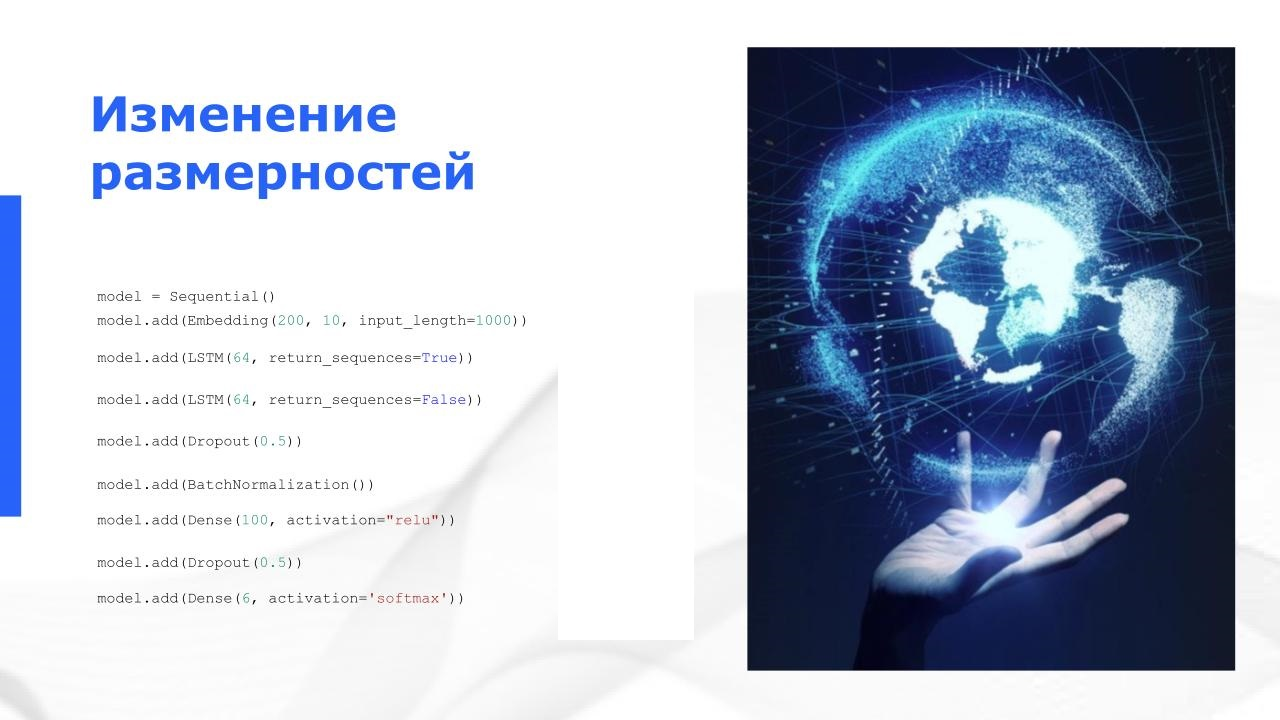

Теперь потренируемся в расчете формы данных при создании НС. Напишите, как будет меняться форма данных после каждого слоя нейронов.

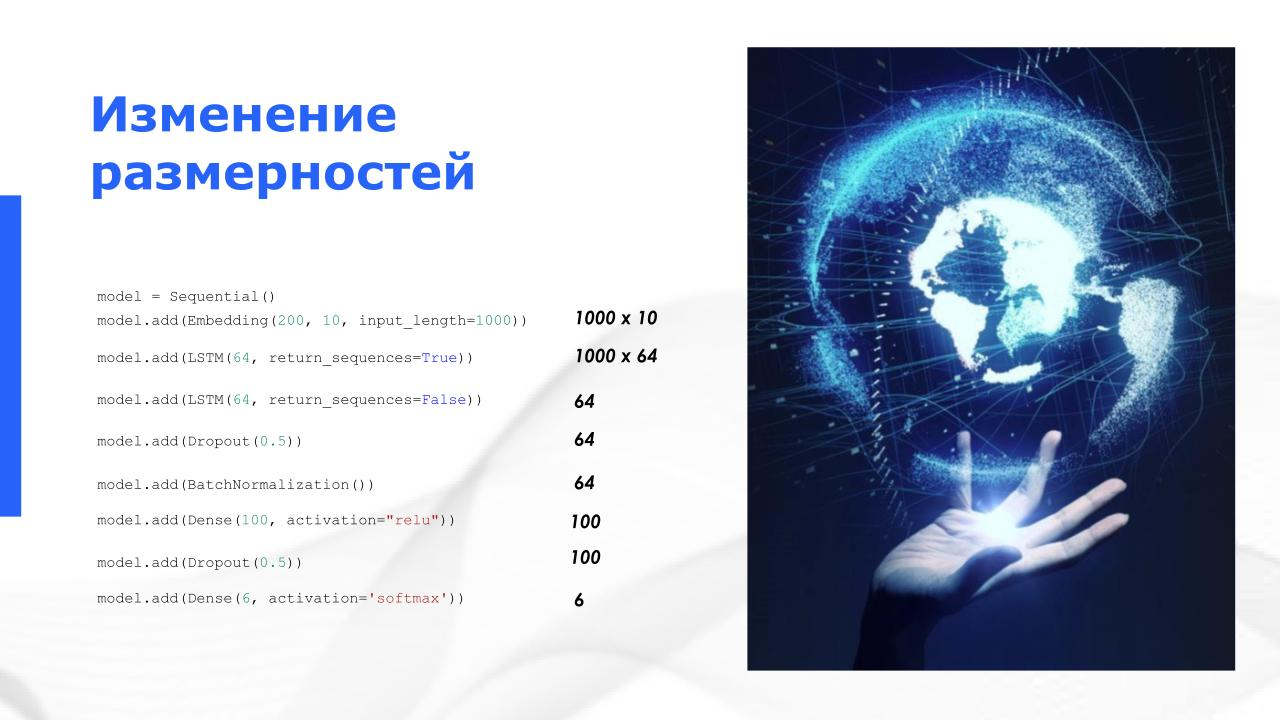

Сверим результаты!

На входе в первый слой подается **1000** слов (то есть последовательность слов, текст), **Embedding**-слой рассчитан на **200** слов (а это размер словаря) и преобразование индексов словаря в **10**-мерные векторы "скрытого пространства". Тензор на выходе слоя будет **1000 х 10**, потому что **Embedding**-слой развернет каждый индекс в вектор из **10** элементов.

В следующем слое параметр **return_sequences** включен, поэтому ячейки выдадут свои результаты для каждого слова, и тензор на выходе будет формы **1000 х 64**.

В третьем слое параметр **return_sequences** отключен, соответственно результат уже будет просто **64** (каждая ячейка выдаст **1** выход после обработки всего текста).

Слои **Dropout** и **BatchNormalization** не меняют форму данных.

**Dense**-слои изменят форму данных на **100**, и затем на **6**.

---

Это важное умение: понимать, как меняется форма данных при прохождении информации через слои нейронной сети.

---

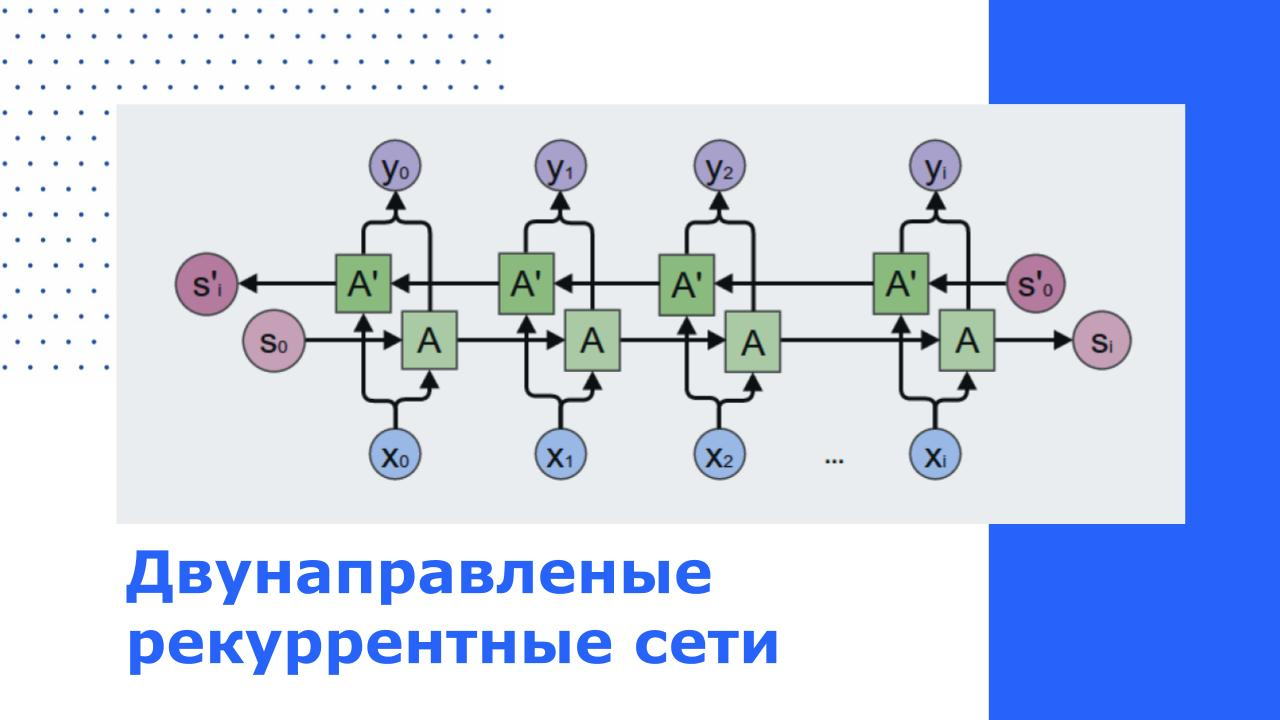

Для текстовых данных иногда используют двунаправленные рекуррентные сети. Этот метод практически бесполезен для временных рядов, аудиоинформации. Его смысл в том, что сначала производится обработка последовательности в прямом направлении, а затем в обратном. По этой причине он и бесполезен, например для аудиодорожки, так как она при проигрывании наоборот не несет никакого смысла. 

Однако при обработке текстов имеет значение контекст, который был до слова и после него, и двунаправленные сети зачастую бывают полезны.

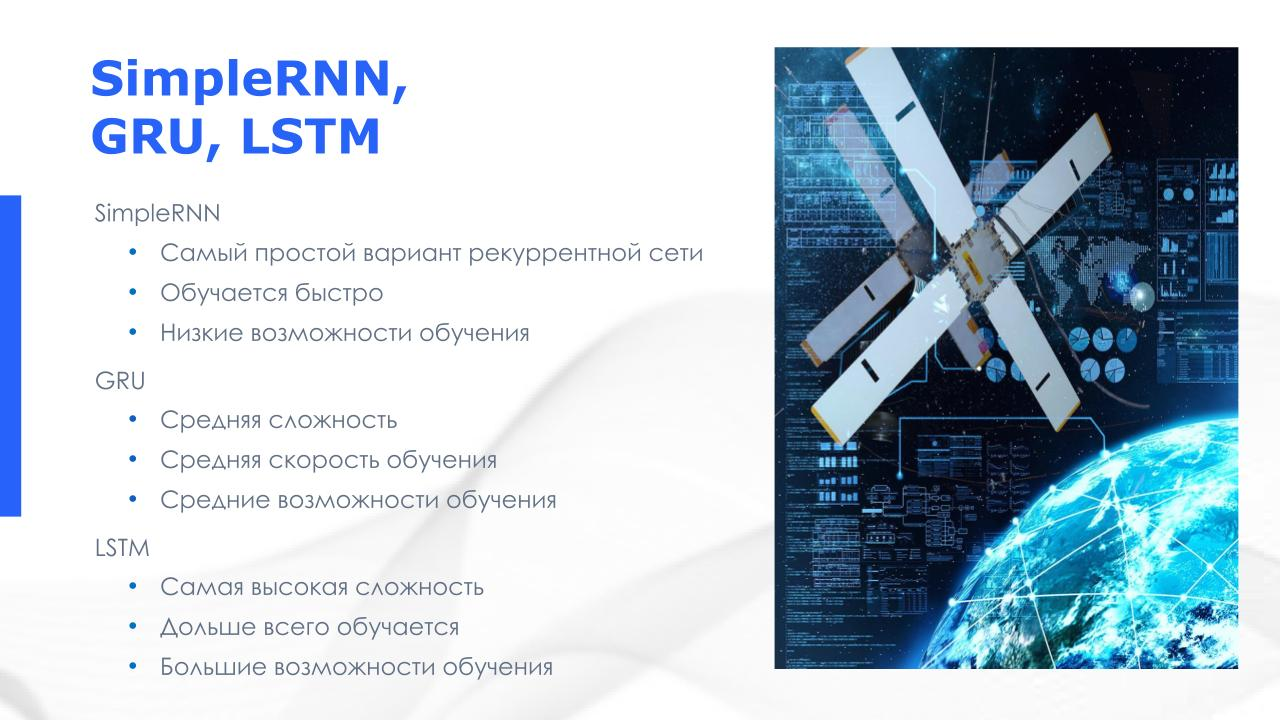

Рассмотрим три рекуррентных слоя, реализованных в **Keras**:
* **SimpleRNN** – самый простой слой. Быстро обучается, но имеет низкие возможности обучения;

* **GRU** – средний по по сложности и возможностям обучения слой;

* **LSTM**- слой, которому свойственны высокая сложность и долгое обучение. Однако это компенсируется большими возможностями запоминания и обучения.

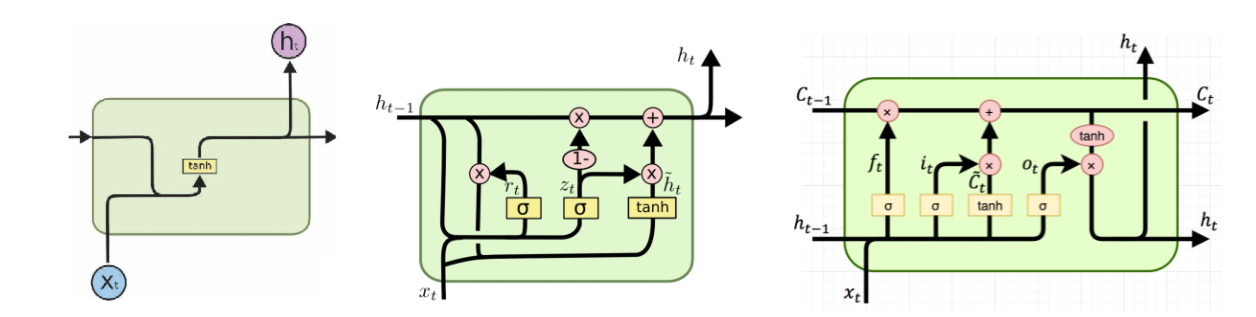

Поясним еще раз работу **LSTM** на примере:

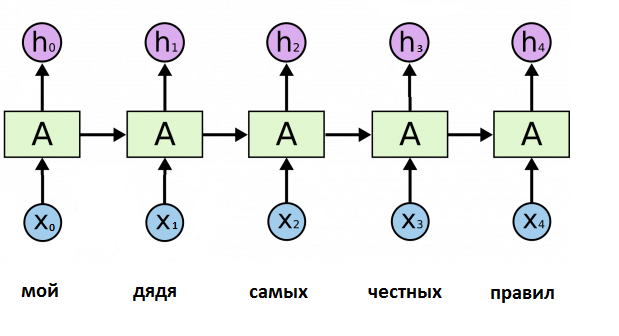

**Шаг 1.** Для наглядности развернем **LSTM**-сеть во времени; начнем подавать на нее фразу **_"Мой дядя самых честных правил"_**. Конечно, сперва фразу нужно прогнать через токенизатор и получить индексы.

**Шаг 2.** Подадим слово **"мой"**. Получим выход сети $h_0$.

**Шаг 3.** Подадим слово **"дядя"** + внутреннее состояние и выход сети с предыдущего шага. Получим выход $h_1$.

. . .

**Шаг N.** Подадим слово **"правил"** + внутреннее состояние и выход сети с предыдущего шага. Получим выход $h_4$.

В нашем случае $h_4$ - это результат обработки **LSTM**-сетью _всей фразы_. В нем сконцентрировано все то, что сеть нашла в предложении, его суть. Именно $h_4$ будет использоваться следущими слоями модели для получения выводов о тексте.

### **CNN - Одномерные сверточные сети**

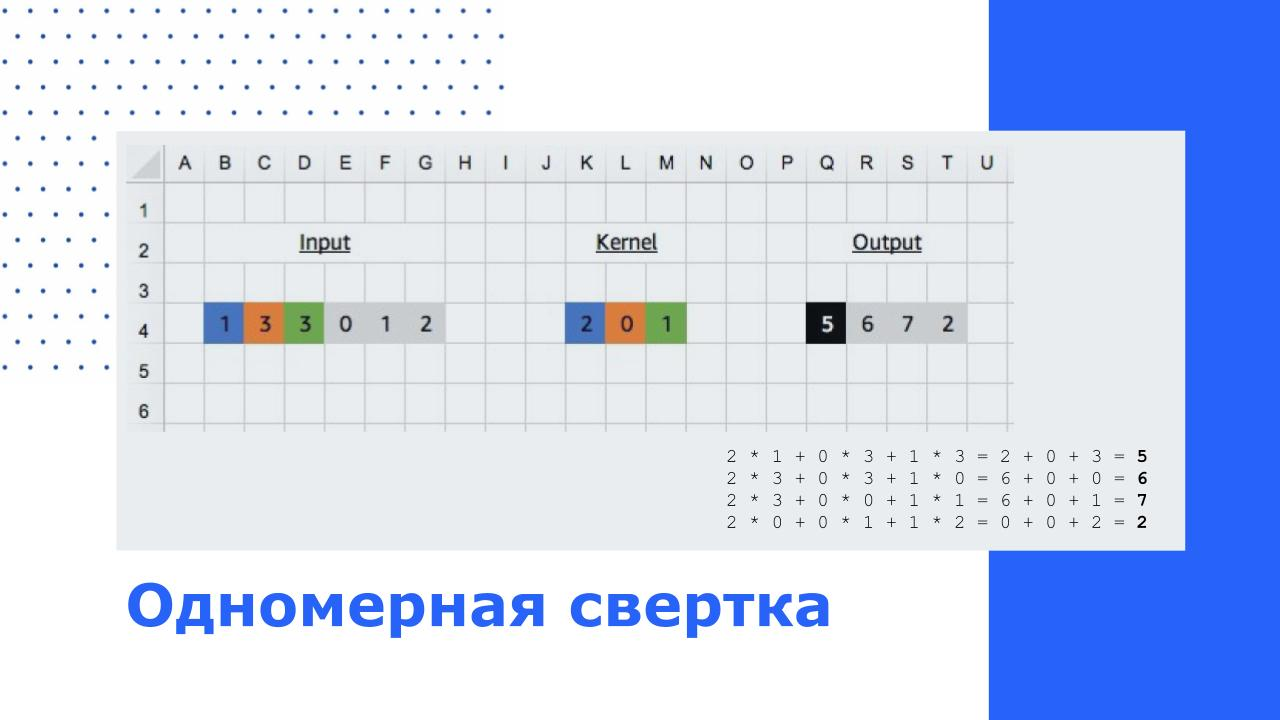

На предыдущих уроках мы рассмотрели применение двумерных сверточных слоев **Conv2D**, которые замечательно себя показывают при обработке изображений. Идея заключалась в том, что по изображению пробегали скользящим окном (ядром) свертки и получали на выходе карту признаков. Практически тот же подход работает и в одномерных сверточных слоях. Вся разница в том, что обрабатывается не изображение, а последовательность (текст). Аналогично, одномерным окном (ядром-вектором) свертки пробегают по набору данных, полученному из первоначального текста. Такой слой называется **_одномерной сверткой_** - **Conv1D**.

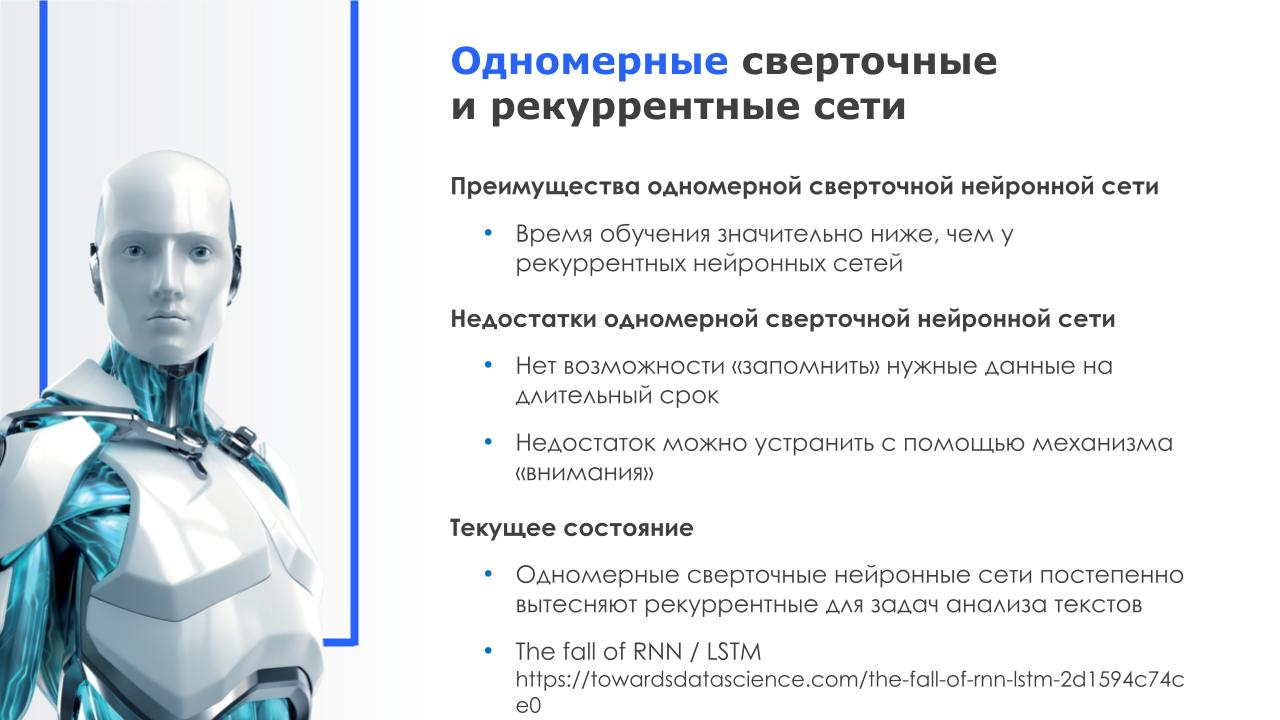

Разберем на примере, как работает свертка.

Дана фраза: **_"Мой дядя самых честных правил, когда не в шутку занемог"_**:

**Шаг 1.**
Индексируем слова токенизатором, получаем список индексов:

**[3, 7, 9, 8, 1, 21, 4, 11, 2, 15]**

**Шаг 2.**
Обрабатываем последовательность индексов ядром одномерной свертки **[2, 0, 1]**.

Состав ядра и индексы показаны условно.

***Замечание***. В первых слоях сети часто используют  **embedding**, чтобы группировать слова, близкие по значению, в близлежащие векторы в некотором многомерном пространстве. Такие векторы-эмбеддинги также подходят для обработки одномерными свертками.

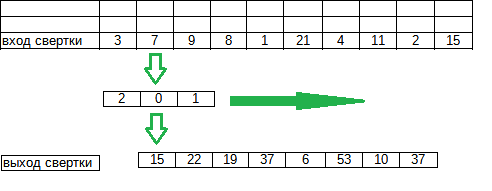

Например, число **15** на выходе появилось так:
$15 = 2 * 3 + 0 * 7 + 1 * 9$

**Шаг 3.**
За один шаг работы ядро одномерной свертки "пробегает" по фразе и выделяет наиболее значимые (с точки зрения весов ядра) фрагменты. Далее полносвязные слои помогают классифицировать текст не просто по наличию слов, а уже учитывая связи слов в предложении.

Чтобы лучше выделить важные части, используют более одного сверточного слоя.

Особенность работы со свертками следущая: к моменту анализа весь текст должен быть получен полностью. Придется примириться с некоторой задержкой при анализе текста.

На сегодняшний день одномерные сверточные слои постепенно вытесняют рекуррентные слои. Свертка анализирует всю фразу сразу. Это приводит к тому, что:
* свертка быстрее обучается и быстрее предсказывает. А значит, для исследователя появляется больше времени на проверку гипотез. Модель нейронки не заставит вас долго ждать результатов своей работы. Рекурентная же сеть изучает фразу последовательно - слово за словом, и в этом ее основное неудобство;
* решается проблема потери контекста в длинных фразах. Рекурентная сеть может "забыть" начало фразы, дойдя до ее конца или даже до середины - еще один недостаток **RNN**. Впрочем, эта проблема может быть решена, если рекуррентную модель дополнить **_механизмом внимания_**.

Теперь вы можете перейти к практической части урока по рекуррентным и сверточным сетям.

Будем решать уже знакомую задачу классификации художественных текстов по авторам. Потребуется провести полноценное исследование и попробовать различные архитектуры, познакомиться с тем, как происходит работа нейронщика при подборе архитектуры сети, параметров обучения и подготовки данных.

**Содержание темы**

1. Теория

2. [Практический ноутбук 1](https://colab.research.google.com/drive/13xkDwB-KXbBevOiPpBC2g-t8q7nG0tAO?usp=sharing)

3. [Практический ноутбук 2](https://colab.research.google.com/drive/16sKNs9MCoVUuuGrhhl-yHgBlhrBWpNPa?usp=sharing)
